#**This is Colaboratory is owned by:**
###1.  Kopal Sharma (J045) 
###2.  Sagarika Raje (J074)
###3. Ujwal Shah (J078)

##**Subject: Deep Learning Final Project**

##**Topic: Breast Cancer Treatment Response Classification Based Flask App**

## **Importing Libraries and Pre-processing**

In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 18.9MB/s 


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import cv2
import skimage.transform as st
import matplotlib.pyplot as plt
import pydicom 
from pydicom.data import get_testdata_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pydicom.dcmread('/content/drive/MyDrive/SM 2 Project/TRAIN_NEW/PCR/1-01 (1).dcm')

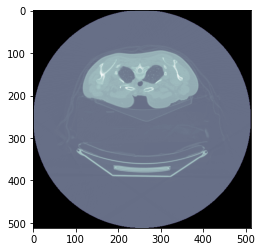

In [ ]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [ ]:
dataset.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [ ]:
dataset.pixel_array.shape

(512, 512)

In [ ]:
del dataset



---



---



---



##Loading TRAIN-PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TRAIN_FINAL/PCR"
train_pcr_images = []
y_train_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=np.round_(img/4096,decimals = 1)
    img = np.reshape(img,(512,512))
    train_pcr_images.append(img)
    y_train_pcr.append(0)

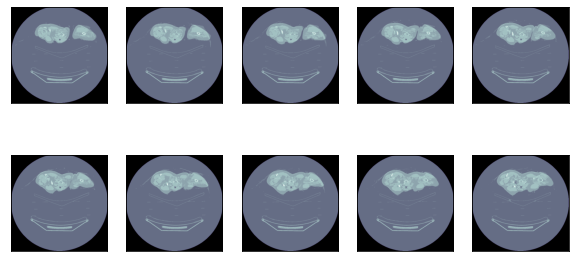

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

##Loading TRAIN-NON PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TRAIN_FINAL/NON-PCR"
train_nonpcr_images = []
y_train_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=np.round_(img/4096,decimals = 1)
    img=np.reshape(img,(512,512))
    train_nonpcr_images.append(img)
    y_train_nonpcr.append(1)

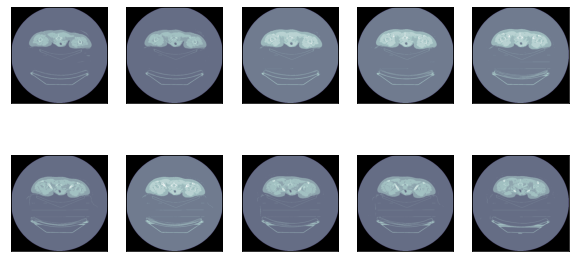

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(train_pcr_images)
print(a.shape)

(166, 512, 512)


In [ ]:
del train_pcr_images

In [ ]:
b=np.array(train_nonpcr_images)
print(b.shape)

(166, 512, 512)


In [ ]:
del train_nonpcr_images

In [ ]:
X_train=np.vstack((a, b))
print(X_train.shape)

(332, 512, 512)


In [ ]:
del a
del b
del img

##Loading TEST-PCR-DataSet

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST_FINAL/pcr"
test_pcr_images = []
y_test_pcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=np.round_(img/4096,decimals = 1)
    img=np.reshape(img,(512,512))
    test_pcr_images.append(img)
    y_test_pcr.append(0)

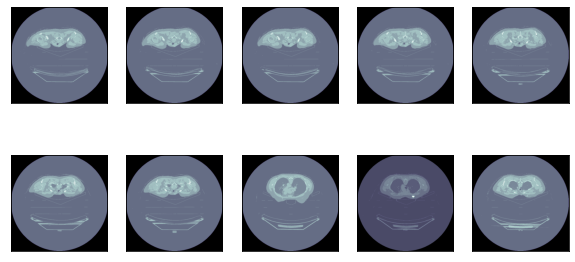

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_pcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

##Loading TEST-NON PCR-DataSet  

In [ ]:
folder="/content/drive/My Drive/SM 2 Project/TEST_FINAL/non-pcr"
test_nonpcr_images = []
y_test_nonpcr=[]
for filename in os.listdir(folder):
  img = np.array(pydicom.dcmread(os.path.join(folder,filename)).pixel_array)
  if img is not None:
    img=np.round_(img/4096,decimals = 1)
    img=np.reshape(img,(512,512))
    test_nonpcr_images.append(img)
    y_test_nonpcr.append(1)

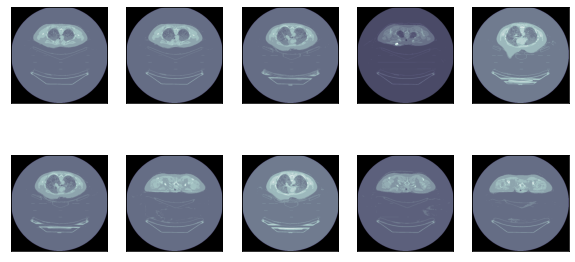

In [ ]:
#To show some images in a group
fig = plt.figure(figsize=(10, 5))
# plot several images
for i in range(10):#Showing 10 images
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_nonpcr_images[i].reshape(512, 512), cmap=plt.cm.bone)

In [ ]:
a=np.array(test_pcr_images)
print(a.shape)

(50, 512, 512)


In [ ]:
b=np.array(test_nonpcr_images)
print(b.shape)

(50, 512, 512)


In [ ]:
del test_pcr_images
del test_nonpcr_images

In [ ]:
X_test=np.vstack((a, b))
print(X_test.shape)

(100, 512, 512)


In [ ]:
del a 
del b
del img



---



---



---



In [ ]:
#-----------------------------TRAIN---------------------------------
y_train_pcr_array=np.array(y_train_pcr)
print(y_train_pcr_array.shape)
y_train_nonpcr_array=np.array(y_train_nonpcr)
print(y_train_nonpcr_array.shape)
Y_train=np.concatenate((y_train_pcr_array,y_train_nonpcr_array))
print(Y_train.shape)
print(Y_train)

#--------------------------TEST----------------------------------------
y_test_pcr_array=np.array(y_test_pcr)
print(y_test_pcr_array.shape)
y_test_nonpcr_array=np.array(y_test_nonpcr)
print(y_test_nonpcr_array.shape)
Y_test=np.concatenate((y_test_pcr_array,y_test_nonpcr_array))
print(Y_test.shape)
print(Y_test)

(166,)
(166,)
(332,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(50,)
(50,)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
del y_train_pcr_array
del y_train_nonpcr_array
del y_test_pcr_array
del y_test_nonpcr_array
del y_train_pcr
del y_train_nonpcr
del y_test_pcr
del y_test_nonpcr

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
X_train.shape

(332, 512, 512)

In [ ]:
Y_train = np.reshape(Y_train, (X_train.shape[0],1))

In [ ]:
Y_train.shape

(332, 1)

In [ ]:
Y_train

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
#pre-processing
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                       X_train: 664.0 MiB
                        X_test: 200.0 MiB
                    Sequential:  1.0 KiB
                         Dense:  1.0 KiB
               KerasClassifier:  1.0 KiB
                         KFold:  1.0 KiB
                  GridSearchCV:  1.0 KiB
            RandomizedSearchCV:  1.0 KiB
                  LabelEncoder:  1.0 KiB
                      Pipeline:  1.0 KiB


In [ ]:
import keras
from keras import regularizers
from keras import optimizers
initializer = keras.initializers.glorot_normal()
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "best-weights-improvement.h5"
checkpoint = ModelCheckpoint(filepath, monitor ='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.01, baseline=5)

callbacks_list = [checkpoint, es]

In [ ]:
print(X_train.shape)
X_train1= np.expand_dims(X_train, 0)
del X_train
X_train_final = np.moveaxis(X_train1, 0, 3)  
del X_train1
print(X_train_final.shape)
print(Y_train.shape)

(332, 512, 512)
(332, 512, 512, 1)
(332, 1)


In [ ]:
Y_test = np.reshape(Y_test, (X_test.shape[0],1))

In [ ]:
a= np.expand_dims(X_test, 0)
del X_test
X_test_final= np.moveaxis(a, 0, 3)  
del a

print(X_test_final.shape)
print(Y_test.shape)

(100, 512, 512, 1)
(100, 1)


## **MobileNet**

In [ ]:
# build the MobileNet network
from keras.models import Model
from keras.layers import Input
from keras import applications
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

input_tensor = Input(shape=(512,512,1))
base_model =  applications.mobilenet.MobileNet(weights=None,include_top= False,input_tensor=input_tensor)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation='relu',kernel_initializer=initializer))
top_model.add(Dropout(0.25))
top_model.add(Dense(1, activation='sigmoid'))
model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
# add the model on top of the convolutional base

# compile the model with adam
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

history=model.fit(X_train_final,Y_train,epochs=50,callbacks=callbacks_list,validation_data=(X_test_final, Y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 256, 32)      288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 256, 256, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 256, 256, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 256, 256, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 256, 256, 32)      0   

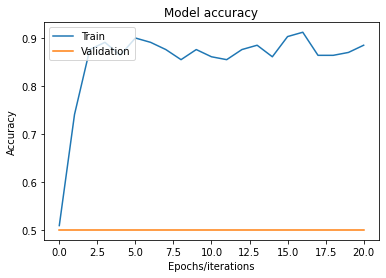

In [ ]:
#representing accuracy graphically
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

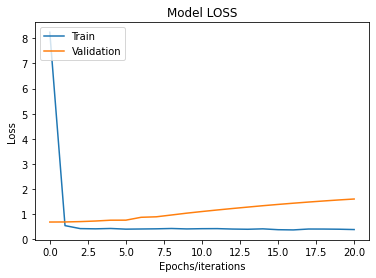

In [ ]:
#representing loss graphically
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [ ]:
from tensorflow import keras
model_new = keras.models.load_model("best-weights-improvement.h5")

In [ ]:
model_new.evaluate(X_test_final, Y_test)

4/4 [==============================] - 2s 227ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473016738892, 0.5]

In [ ]:
final_predictions=[]
predictions=model_new.predict(X_test_final)
for x in predictions:
  if x >0.5:
    z=1
  else:
    z=0
  final_predictions.append(z)
pred=np.array(final_predictions)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
del input_tensor 
del base_model 
del top_model
del model

## **Xception**

In [ ]:
# build the Xception network
from keras.models import Model
from keras.layers import Input
from keras import applications
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

input_tensor = Input(shape=(512,512,1))
base_model =  applications.Xception(weights=None,include_top= False,input_tensor=input_tensor)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation='relu',kernel_initializer=initializer))
top_model.add(Dropout(0.25))
top_model.add(Dense(1, activation='sigmoid'))
model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
# add the model on top of the convolutional base

#set the first 35 layers (up to the last conv block) to non-trainable (weights will not be updated)
for layer in model.layers[:35]:
  layer.trainable = False

# compile the model with adam
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

history=model.fit(X_train_final,Y_train,epochs=50,callbacks=callbacks_list,validation_data=(X_test_final, Y_test))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 255, 255, 32) 288         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 255, 255, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 255, 255, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

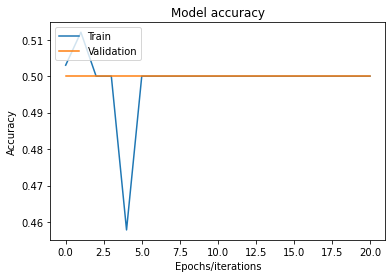

In [ ]:
#representing accuracy graphically
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

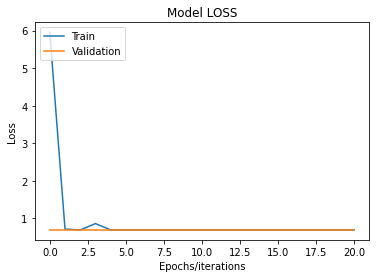

In [ ]:
#representing loss graphically
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Loss")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [ ]:
from tensorflow import keras
model_new = keras.models.load_model("best-weights-improvement.h5")

In [ ]:
model_new.evaluate(X_test_final, Y_test)

4/4 [==============================] - 2s 227ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931473016738892, 0.5]

In [ ]:
final_predictions=[]
predictions=model_new.predict(X_test_final)
for x in predictions:
  if x >0.5:
    z=1
  else:
    z=0
  final_predictions.append(z)
pred=np.array(final_predictions)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
del input_tensor 
del base_model 
del top_model
del model
del history

Thank you!



---

---

---





